# Análisis de ventas instacart

Evaluar, limpiar y preparar un conjunto de datos modificado de Instacart para garantizar su calidad y confiabilidad en futuros análisis sobre el comportamiento de compra de los clientes.

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('D:\Daniel\TRIPLETEN\SPRINT 4\instacart_orders.csv', sep = ';')
products  = pd.read_csv('D:\Daniel\TRIPLETEN\SPRINT 4\products.csv', sep = ';')
aisles = pd.read_csv('D:\\Daniel\\TRIPLETEN\\SPRINT 4\\aisles.csv', sep = ';')
departments = pd.read_csv('D:\Daniel\TRIPLETEN\SPRINT 4\departments.csv', sep = ';')
order_products = pd.read_csv('D:\Daniel\TRIPLETEN\SPRINT 4\order_products.csv', sep = ';')

In [3]:
# mostrar información del DataFrame
orders.info()
#instacart_null = instacart_orders[(instacart_orders['days_since_prior_order'].isnull())]


#print('1) El numero de nulls asociado se asocia con todos aquellos "order_number" iguales a 1  \n',instacart_null['order_number'].value_counts())

#print('2) Numero de usuarios unicos los cuales son 157437 mas sin enevargo se evidencia no esta registrado el primer pedido de todos estos ya que solo exiten 28819 order_number \n',instacart_orders['user_id'].nunique())
print(orders['order_hour_of_day'].value_counts())
#print(instacart_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: count, dtype: int64


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()
print(aisles['aisle'].nunique())
print(aisles['aisle'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
134
['prepared soups salads' 'specialty cheeses' 'energy granola bars'
 'instant foods' 'marinades meat preparation' 'other' 'packaged meat'
 'bakery desserts' 'pasta sauce' 'kitchen supplies' 'cold flu allergy'
 'fresh pasta' 'prepared meals' 'tofu meat alternatives'
 'packaged seafood' 'fresh herbs' 'baking ingredients'
 'bulk dried fruits vegetables' 'oils vinegars' 'oral hygiene'
 'packaged cheese' 'hair care' 'popcorn jerky' 'fresh fruits' 'soap'
 'coffee' 'beers coolers' 'red wines' 'honeys syrups nectars'
 'latino foods' 'refrigerated' 'packaged produce' 'kosher foods'
 'frozen meat seafood' 'poultry counter' 'butter' 'ice cream ice'
 'frozen meals' 'seafood counter' 'dog food c

In [6]:
# mostrar información del DataFrame
departments.info()
print(departments['department'].nunique())
print(departments['department'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
21
['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']


In [7]:
# mostrar información del DataFrame

order_products.info(show_counts= True)
print(order_products.isnull().sum())

ord_add = order_products[(order_products['order_id'] == 1832957)].sort_values(by='add_to_cart_order')
print(ord_add)
print(ord_add['add_to_cart_order'].isnull().sum())
#print(order_products['add_to_cart_order'].unique())

#print(order_products.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
2092839   1832957       48925                1.0          1
126477    1832957       30898                2.0          1
72570     1832957       39877                3.0          1
1842972   1832957       17706                4.0          1
1486738   1832957       30908                5.0          1
...           ...         ...                ...        ...
272

## Conclusiones


1. aisles y departments: no dependen de ninguna tabla son unicas el indicar el pasillo y departamento en la cual se encuntra un producto siendo idependientes evidenciando que ninguna tiene valores nulos teniendo cada una 134 pasillos y 21 departamentos unicos.

2. products: tabla que depende de aisles y departments, esta nos da una visual bastante clara de los productos unicos del negocio, visualisando 1258 valores nullos en product_name posiblemente no se le puso el nombre donde eliminarlos puede afectar el analisis ya que order_products depende de product_id

3. order_products: tabla que depende de products, presenta 4545007 registros la mas larga de todas donde no visualiza la columna tipica de 'Non-Null count' segun la literatura, puede no aparezca debido a la magnitud de la tabla, mas sin embargo con isnull().sum() evidenciamos que add_to_cart_order presenta 836 valores nullasociados a aqueellos valores que no tomaron el orden en el cual se ingrearon los productos segun el order_id

4. instacart_orders: tabla que depende deun order_id y un user_id el cual contempla en la columna 'days_since_prior_order'  28819 valores nulos, todos asociadoas a  order_number iguales a 1 los cuales  se pueden tratar dejando en 0 ya que fue la primera compra, sin embargo se evidencia  157437 valores unicos de user_id interptetando son la cantidad de ususarios que se han tenido mas sin embargo se evidencia no es la misma cantidad de order_number iguales a 1, ya que al buscar hay usuarios que tienen resgistros de ordenes los cuales inician con un numero diferente de  1

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
Inicialmente como bien se ha aprendido importante iniciar con una correcta limpieza de datos, deste la eliminacion de duplicados asi como el manejo correcto de los valores NaN previo a la eliminacion de cualquier registro

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
duplicates_df = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(duplicates_df[['order_id', 'user_id', 'order_dow', 'order_hour_of_day']])

        order_id  user_id  order_dow  order_hour_of_day
4838     2766110   162084          3                  2
5156     2190225   138285          3                  2
15506     553049    58599          3                  2
18420     382357   120200          3                  2
24691     690242    77357          3                  2
...          ...      ...        ...                ...
457013   3384021    14881          3                  2
458816    910166   164782          3                  2
459635   1680532   106435          3                  2
468324    222962    54979          3                  2
477526   2592344    46860          3                  2

[121 rows x 4 columns]


¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicates_df = orders[orders['order_id'].duplicated()]
print(duplicates_df[['order_id', 'user_id', 'order_dow', 'order_hour_of_day']])


Empty DataFrame
Columns: [order_id, user_id, order_dow, order_hour_of_day]
Index: []


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


Luego de la verificacion y eliminacion de los duplicados se logra entender  a pesar de ser unicamente 15 registros duplicados estos ayudan a mejorar la precision del analisis a desarrollar sin mebargo toca evaluar si tratar los null de 'days_since_prior_order', pero al no ser relvante para el analisis no se tocaran

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())


0


In [15]:
# Verifica si hay IDs duplicadas de productos
print(products['product_id'].duplicated().sum())

0


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()


#saco la cantidad duplicados de nombres
print(products['product_name'].duplicated().sum())
#saco la cantidad de nulos
print(products['product_name'].isnull().sum())
#resto duplciados y nulos para entender como se obtiene los 488332 unicos teneindo 48436 originalmente en la info del df
print(products['product_name'].duplicated().sum() - products['product_name'].isnull().sum())
print(products['product_name'].nunique())

1361
1258
103
48332


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
# Filtrar los productos no faltantes (no nulos)
products_not_null = products[products['product_name'].notnull()]

# Obtener los productos con nombres duplicados
duplicated_products = products_not_null[products_not_null['product_name'].duplicated(keep=False)]

# Imprimir los productos con nombres duplicados
print(duplicated_products['product_name'].value_counts())

#imprimo un duplicado a fin de corroborar su comportamiento para tomar decicicion si eliminar tados con nombre duplicados
print(products[(products['product_name'] == 'GREEN TEA WITH GINSENG AND HONEY')])


product_name
GREEN TEA WITH GINSENG AND HONEY              3
FRESH SCENT DISHWASHER DETERGENT WITH DAWN    2
BIOTIN 1000 MCG                               2
CAULIFLOWER HEAD                              2
NUTRITION PROTEIN MIX BLUEBERRY NUT           2
                                             ..
SPREADABLE BUTTER WITH CANOLA OIL             2
BURRITO- STEAK & CHEESE                       2
COOKIES 'N CREAM ICE CREAM                    2
PINEAPPLE SLICES IN 100% PINEAPPLE JUICE      2
VITAMIN D3 5000 IU                            2
Name: count, Length: 103, dtype: int64
       product_id                      product_name  aisle_id  department_id
2037         2038  GREEN TEA WITH GINSENG AND HONEY        94              7
5455         5456  GREEN TEA WITH GINSENG AND HONEY        96             20
19813       19814  GREEN TEA WITH GINSENG AND HONEY        94              7


En este caso decido dejar los nombres duplicados pues si bien al eliminarlos puede al intentere hacer un merge con la tabla de order_products afecte su union ya que eliminaria id de productos que aparecen en la tabla de order_products.

Por otro lado queda evaluar que hacer con los NaN de la tabla productos en la columna 'product_name'

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [19]:
# Revisa si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())
departments['department'] =  departments['department'].str.upper().str.strip().str.replace(' ', '_')
print(departments['department'].duplicated().sum())


0
0


Se evidencia cero duplicidad en los datos y nulos dejandolo intactos

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [21]:
# Revisa si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())
aisles['aisle'] =  aisles['aisle'].str.upper().str.strip().str.replace(' ', '_')
print(aisles['aisle'].duplicated().sum())

0
0


Se evidencia cero duplicidad en los datos y nulos dejandolo intactos

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())

4094961
4499434


Segun el analisis inicial de la data es posibel evidecniar que la es normal evidenciar order_id u product_id duplicados pues fianlmente esta tabla desglosa todos los product_id que trar un order_id por lo cual el comportamiento de duplicidad se conideraria normal

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
products_name_null = products[products['product_name'].isnull()]
print(products_name_null['product_name'].isna().sum())

1258


Se evidencian los valores ausentes en 'product_name' son 1258, pero se indagara sobre si toca eliminarlos

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(products_name_null['aisle_id'].value_counts())

aisle_id
100    1258
Name: count, dtype: int64


Evidentemente los NaN de 'product_name' estan asociados al aisle_id numero 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products_name_null['department_id'].value_counts())


department_id
21    1258
Name: count, dtype: int64


Evidentemente los NaN de 'product_name' estan asociados al 'department_id' numero 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisles_100 = aisles[aisles['aisle_id'] == 100]
departments_21 = departments[departments['department_id'] == 21]

print(aisles_100)
print(departments_21)

    aisle_id    aisle
99       100  MISSING
    department_id department
20             21    MISSING


Describe brevemente cuáles son tus hallazgos.

Se evidencia que tanto el pasillo 100 como el departamento 21 no tienen un nombre definidio, dejando MISSIG, posiblemente no se les asigno nombre en em momento de su registro o hallan sido usados para su posterior eliminacion

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Si bien las 1258 Unknown de product_name  no se eliminaron al inicio incluso al haber duplicados en sus nombres, este ejercicio nos dio a entender que el producto puede que halla tenido un movimiento de pasillo y departamento lo cual generaba posiblemetne una nueva creacion de un nuevo product_id 

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(orders.isnull().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# primeros pedidos de cada cliente
first_orders = orders.groupby('user_id')['order_number'].min()

# pedidos que no son el primero de cada cliente
not_first_orders = orders[~orders['order_number'].isin(first_orders.values)]


#valores ausentes en 'days_since_prior_order' para estos pedidos
missing_days_since_prior_order = not_first_orders['days_since_prior_order'].isnull().any()

# resultado
print("¿Hay algún valor ausente en 'days_since_prior_order' para pedidos que no son el primero?", missing_days_since_prior_order)



¿Hay algún valor ausente en 'days_since_prior_order' para pedidos que no son el primero? False


Se evidencia que aquellos pedididos que no son el primero no tienen asuencia en su columna 'days_since_prior_order', por lo que como se describio al inicio del analisis la ausencia en esta columna se genera en los primeros pedidos asignados al 1 en todos los usuarios que tienen registrada su primera compra para un total de 28817

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(order_products.isnull().sum())
print(order_products['order_id'].nunique())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
450046


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('el valor minimo de add_to_cart_order es:', order_products['add_to_cart_order'].min())
print('el valor maximo de add_to_cart_order es:', order_products['add_to_cart_order'].max())



el valor minimo de add_to_cart_order es: 1.0
el valor maximo de add_to_cart_order es: 64.0


La columna 'add_to_cart_order' presenta 836 valores null asociados a aquellos valores que no tomaron el orden en el cual se ingrearon los productos segun el order_id

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
# Filtrar las filas donde 'add_to_cart_order' es nulo
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]

# Extraer las 'order_id' de estas filas
order_ids_with_missing_add_to_cart_order = missing_add_to_cart_order['order_id'].drop_duplicates()
print(order_ids_with_missing_add_to_cart_order)

#se evidencian 70 order_id  tienen valores null de 450046 unicos order_id 


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
2437093       9310
2438301    2170451
3275635    2979697
3282194    1625713
3357079    1529171
Name: order_id, Length: 70, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

#filtro mi df original con aquellos order_id que tienen valores nulos
filtered_order_products = order_products[order_products['order_id'].isin(order_ids_with_missing_add_to_cart_order)]


#agrupo el resultado por order_id y cuento por producto_id, adicional los ordenode de mayor a menor para visual
order_counts = filtered_order_products.groupby('order_id')['product_id'].count().sort_values(ascending=False)

#saco el numero minimo el cual da 65
print(order_counts.min())

65


Se evidencia en todos los pedidos 'order_id' que tienen un valor ausente en 'add_to_cart_order' superan los 64 productos siendo el minimo de 65

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


# Reemplazar los valores ausentes en 'add_to_cart_order' con 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# Convertir la columna 'add_to_cart_order' al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verificar los tipos de datos de las columnas para confirmar el cambio
print(order_products.dtypes)
print(order_products.isnull().sum())







order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Luego de evidenciar que todos los valores nullos estaban asociados a ordenes que tenian mas de 64 productos se llenaron con el 999 ya que el eliminarlos afectaria el analisis ya que continene productos unicos, posiblemente el minimo de 64 se asocia a que la aplicacion que registra el orden de adicion no esta parametrisada para superar los 64 productos, lo que genera que muchos valores queden en NaN

## Conclusiones

1. Para la tabla instacart_orders o order se eliminaron  los duplicados para un total de 15, adicional se evidencio que la mayoria de los datos ausente se relacionaban a aquellos user_id con order_id igual a 1 en su totalidad en la columna 'days_since_prior_order'.
2. para la tabla products se evaluan los duplicados por nombre de producto mas sin embargo no se eliminan ya que se evidenia puderion ser proudctos que se movian de departamento y pasillo, adicional los product_name nulls se dejaron como unknow ya que eliminaros significaria que se borraria data importante sobre productos que se adquirieron, tener presente que estos unknow etaban asociados al pasillo 100 y el departamento 21, posiblemente paso algo con esta seccion y oficina.
3. Para la tabla order_products, no se encontraron duplicados y los valores nullos de su columna 'add_to_cart_order' se les agrego el numero 999 adicional de convertirla a int al no ncesario dejarla en float
4. Las tablas aisles y department no tuvieron movieminto al no encontrar particualidad de duplciados o nullos en estas.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [52]:
print('el valor minimo de "order_hour_of_day" es: ', orders['order_hour_of_day'].min(), 'y su valor maximo es: ', orders['order_hour_of_day'].max())
print('el valor minimo de "order_dow" es: ', orders['order_dow'].min(), 'y su valor maximo es: ', orders['order_dow'].max())
print('segun la info de esta tabla ambas columnas preceden valores de tipo int64')
print(orders['order_dow'].unique())
print(orders['order_hour_of_day'].unique())


el valor minimo de "order_hour_of_day" es:  0 y su valor maximo es:  23
el valor minimo de "order_dow" es:  0 y su valor maximo es:  6
segun la info de esta tabla ambas columnas preceden valores de tipo int64
[6 5 0 4 3 1 2]
[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


Escribe aquí tus conclusiones

Se evidencia que los minimos y maximos de order_hour_of_day y order_dow estan dentros de los limintes a verificar aidcional se verifican los unicos donde no se evidencian numeros fuera de los limites, adicional de que la funcion info() nos da la seguridad de que la columna esta en valores  int64

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

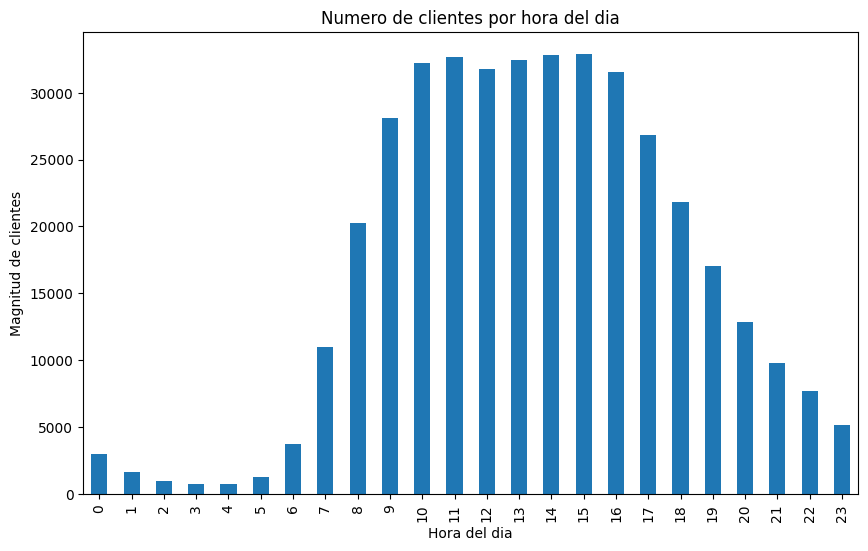

In [38]:
# Agrupar por 'order_hour_of_day' y contar el número único de 'user_id'
hourly_orders = orders.groupby('order_hour_of_day')['user_id'].nunique().reset_index()

hourly_orders.plot(
    x = 'order_hour_of_day',
    y = 'user_id',
    title = 'Numero de clientes por hora del dia',
    kind = 'bar',
    xlabel = 'Hora del dia',
    ylabel = 'Magnitud de clientes',
    figsize= [10, 6],
    legend= False
)

plt.show()

SE VISUALIZA QUE EL INTERVALO MAS CONCURRIDO POR LA LCIENTELA VA DESDE LAS 7 HAST LAS 21 SIENDO CASI 15 HORAS DE EN LAS CULAES LA CLIENTELA SUPERA LOS 10MIL USUARIOS

### [A3] ¿Qué día de la semana compran víveres las personas?

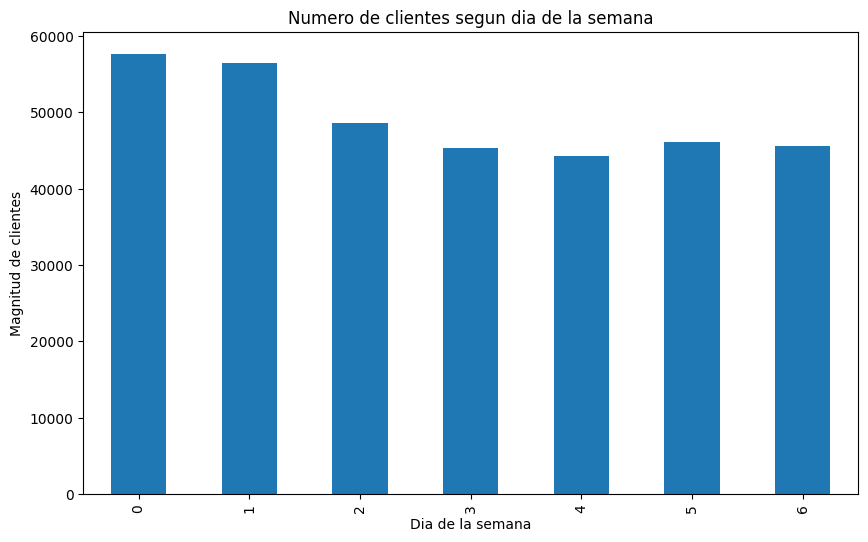

In [53]:
hourly_orders = orders.groupby('order_dow')['user_id'].nunique().reset_index()

hourly_orders.plot(
    x = 'order_dow',
    y = 'user_id',
    title = 'Numero de clientes segun dia de la semana',
    kind = 'bar',
    xlabel = 'Dia de la semana',
    ylabel = 'Magnitud de clientes',
    figsize= [10, 6],
    legend= False
)

plt.show()

Se evidencia los días de mayor compra son los domingos y lunes, concluyendo que entre semana al ser horas laborales para los clientes a excepción del lunes son menor el flujo posiblemente por temas laborales de martes a sábado, por lo anterior el foco de interés para dar mayor asistencia serían domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

C:\Users\HOME\AppData\Local\Temp\ipykernel_10136\859716917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_no_null['days_since_prior_order'] = orders_no_null['days_since_prior_order'].astype(int)


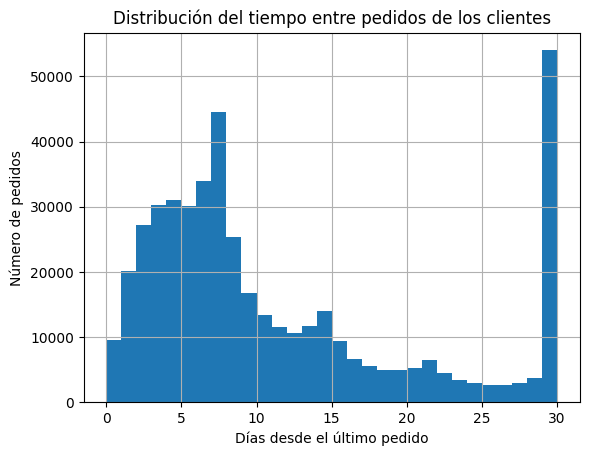

Valor mínimo: 0 días
Valor máximo: 30 días


In [54]:
# Filtrar los valores NaN en 'days_since_prior_order'
orders_no_null = orders.dropna(subset=['days_since_prior_order'])

# Convertir 'days_since_prior_order' a entero para evitar problemas con los flotantes en el histograma
orders_no_null['days_since_prior_order'] = orders_no_null['days_since_prior_order'].astype(int)

# Crear un histograma

orders_no_null.hist(
    column= 'days_since_prior_order',
    bins=30,    
)

plt.title('Distribución del tiempo entre pedidos de los clientes')
plt.xlabel('Días desde el último pedido')
plt.ylabel('Número de pedidos')
plt.show()

# Obtener y mostrar los valores mínimos y máximos
min_days = orders_no_null['days_since_prior_order'].min()
max_days = orders_no_null['days_since_prior_order'].max()
print(f"Valor mínimo: {min_days} días")
print(f"Valor máximo: {max_days} días")

Si bien 0 a 30 días son los límites de tiempo para la ejecución de pedidos, se evidencia que el foco se genera en los días del 0 al 10 siendo el interés encontrado al día 30, posiblemente como bien se sabe las familias hacen compras mensuales, esperando hasta el siguiente mes de pago de nómina para volver a ejecutar su compra.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

C:\Users\HOME\AppData\Local\Temp\ipykernel_10136\3503329513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_orders['order_hour_of_day'] = wednesday_orders['order_hour_of_day'].astype(int)
C:\Users\HOME\AppData\Local\Temp\ipykernel_10136\3503329513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_orders['order_hour_of_day'] = saturday_orders['order_hour_of_day'].astype(int)


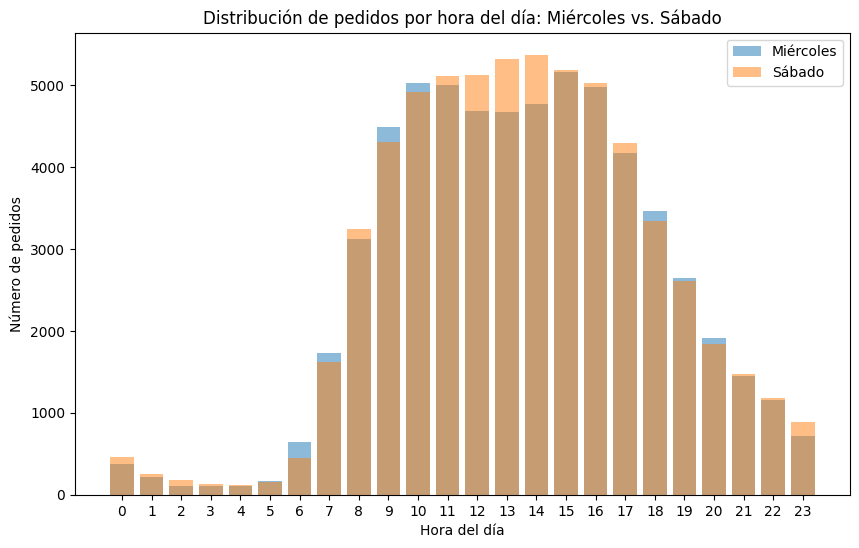

Descripción de las diferencias entre los gráficos de Miércoles y Sábado:


In [55]:
# Filtrar los datos para los miércoles (order_dow == 3) y los sábados (order_dow == 6)
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

# Convertir 'order_hour_of_day' a entero para evitar problemas con los flotantes en el histograma
wednesday_orders['order_hour_of_day'] = wednesday_orders['order_hour_of_day'].astype(int)
saturday_orders['order_hour_of_day'] = saturday_orders['order_hour_of_day'].astype(int)

# Contar el número de pedidos por 'order_hour_of_day' para los miércoles y los sábados
wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Crear un gráfico de barras para ambos días en la misma figura
plt.figure(figsize=(10, 6))

# Trazar los datos de los miércoles
plt.bar(wednesday_counts.index, wednesday_counts.values, label='Miércoles', alpha=0.5)

# Trazar los datos de los sábados
plt.bar(saturday_counts.index, saturday_counts.values, label='Sábado', alpha=0.5)

# Añadir un título y etiquetas a los ejes
plt.title('Distribución de pedidos por hora del día: Miércoles vs. Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24))

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Describir las diferencias observadas
print("Descripción de las diferencias entre los gráficos de Miércoles y Sábado:")
# Aquí deberías analizar los gráficos y describir las diferencias en la distribución de pedidos
# por hora del día entre los miércoles y los sábados. Por ejemplo, podrías mencionar si hay
# horas pico diferentes, si el volumen general de pedidos es mayor en uno de los días, etc.

Ambos días con comportamiento muy similar como vimos en la gráfica de magnitud de clientes por día de la semana estos dos días presentan una cifra similar, en este caso, tomando como referencia la hora del día y pedidos realizados, visualizamos que se tiene bastante foco de atención desde las 7 hasta las 22 muy similar a la magnitud de clientes al llegar a más de los 1000 pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

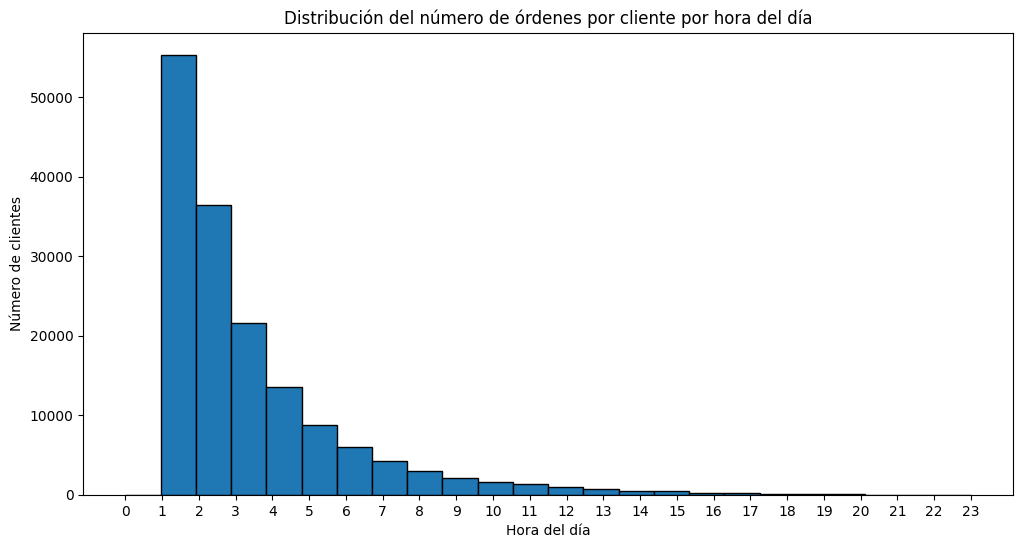

In [56]:
# Agrupar por 'user_id' y contar el número de órdenes por cliente y convertirloa un frame
order_counts = orders.groupby('user_id').size().to_frame(name='count')

# Crear un histograma de la distribución del número de órdenes por cliente
plt.figure(figsize=(12, 6))  
# Aumentar el tamaño de la figura para más claridad
ax = order_counts['count'].plot(kind='hist', bins=24, range=(0, 23), edgecolor='black')

# Añadir un título y etiquetas a los ejes
plt.title('Distribución del número de órdenes por cliente por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de clientes')
plt.xticks(range(0, 24))

# Mostrar el gráfico
plt.show()

Se evidencia que el acumulado se encuentra en clientes que generan un solo pedido dececiendo significativamente al quinto pedido siendo menor a 10 mil usuarios lo que generan este quinto pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

       product_id              product_name  count
22808       24852                    BANANA  66050
12025       13176    BAG OF ORGANIC BANANAS  53297
19370       21137      ORGANIC STRAWBERRIES  37039
20077       21903      ORGANIC BABY SPINACH  33971
43271       47209      ORGANIC HASS AVOCADO  29773
43788       47766           ORGANIC AVOCADO  24689
43663       47626               LARGE LEMON  21495
15364       16797              STRAWBERRIES  20018
24047       26209                     LIMES  19690
25556       27845        ORGANIC WHOLE MILK  19600
25666       27966       ORGANIC RASPBERRIES  19197
21025       22935      ORGANIC YELLOW ONION  15898
22908       24964            ORGANIC GARLIC  15292
41244       45007          ORGANIC ZUCCHINI  14584
35996       39275       ORGANIC BLUEBERRIES  13879
45561       49683            CUCUMBER KIRBY  13675
25889       28204        ORGANIC FUJI APPLE  12544
5375         5876             ORGANIC LEMON  12232
7543         8277  APPLE HONEYC

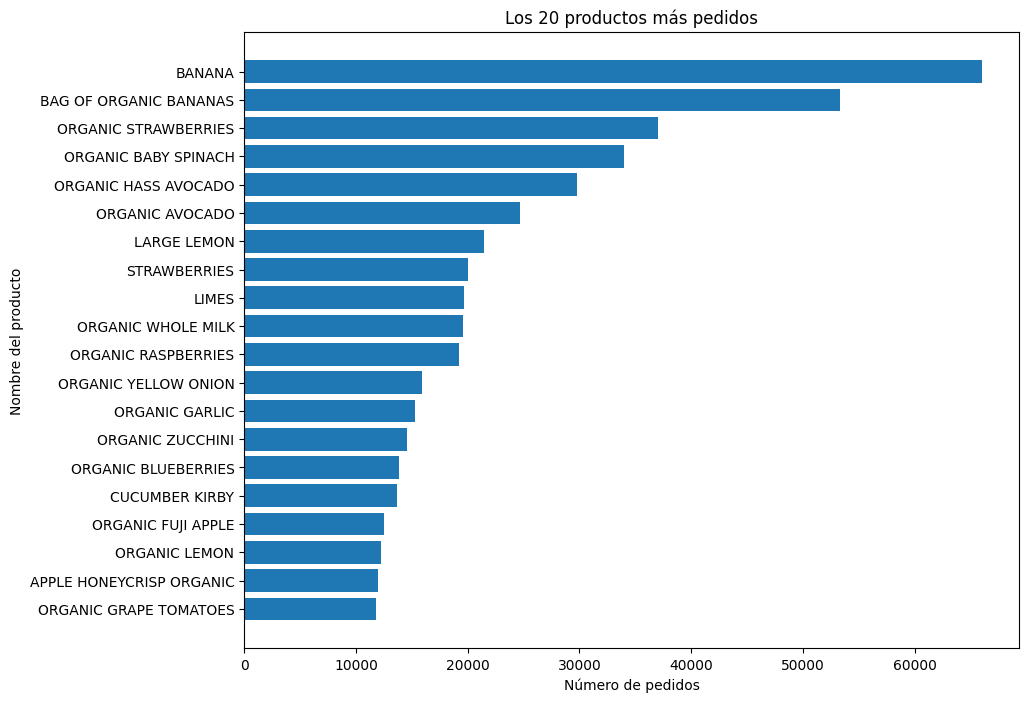

In [58]:
# Unir los datos de productos con los datos de pedidos con inner como defecto de merge
merged_df = order_products.merge(products, on='product_id')

# Agrupar por 'product_id' y 'product_name', y contar el número de pedidos y ordenar  desendentemente
product_counts = merged_df.groupby(['product_id', 'product_name']).size().reset_index(name='count').sort_values(by='count', ascending=False)
print(product_counts.head(20))
top_20_products = product_counts.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_20_products['product_name'], top_20_products['count'])  # Usa barh para un gráfico de barras horizontal
plt.xlabel('Número de pedidos')
plt.ylabel('Nombre del producto')
plt.title('Los 20 productos más pedidos')
plt.gca().invert_yaxis()  # Invertir el eje y para que el producto más pedido esté en la parte superior
plt.show()

El producto de mayor consumo son las bananas las cuales hacen parte de la dieta diaria del hogar seguido de demás alimentos comunes de la canasta familiar.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


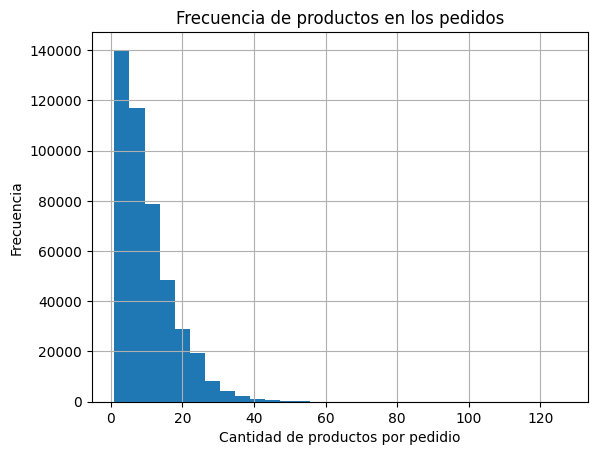

In [103]:
# Agrupar por 'order_id' y contar el número de productos en cada pedido
order_size = order_products.groupby('order_id').count().sort_values(by='product_id').reset_index()
#print(order_size)

# frecuqnsi = order_size['product_id'].describe()
# print(frecuqnsi)

# Ordenar el índice resultante
productsOrder_frequency = order_size.value_counts().sort_index().reset_index()
print(productsOrder_frequency['product_id'].describe())
# Crear un histograma a partir de los datos de frecuencia de los productos
productsOrder_frequency.hist(
    column= 'reordered',
    bins= 30,
)
plt.title('Frecuencia de productos en los pedidos')
plt.xlabel('Cantidad de productos por pedidio')
plt.ylabel('Frecuencia')
plt.show()




Se logra visualizar que la cantidad de articulos comprados por orden se enfocan de gran manera entre los 5 a 14 artuculos siendo la media general de 10 articulos por pedido, donde los casos donde se visualizan 127 articulos no llegan a ser frecuentes

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

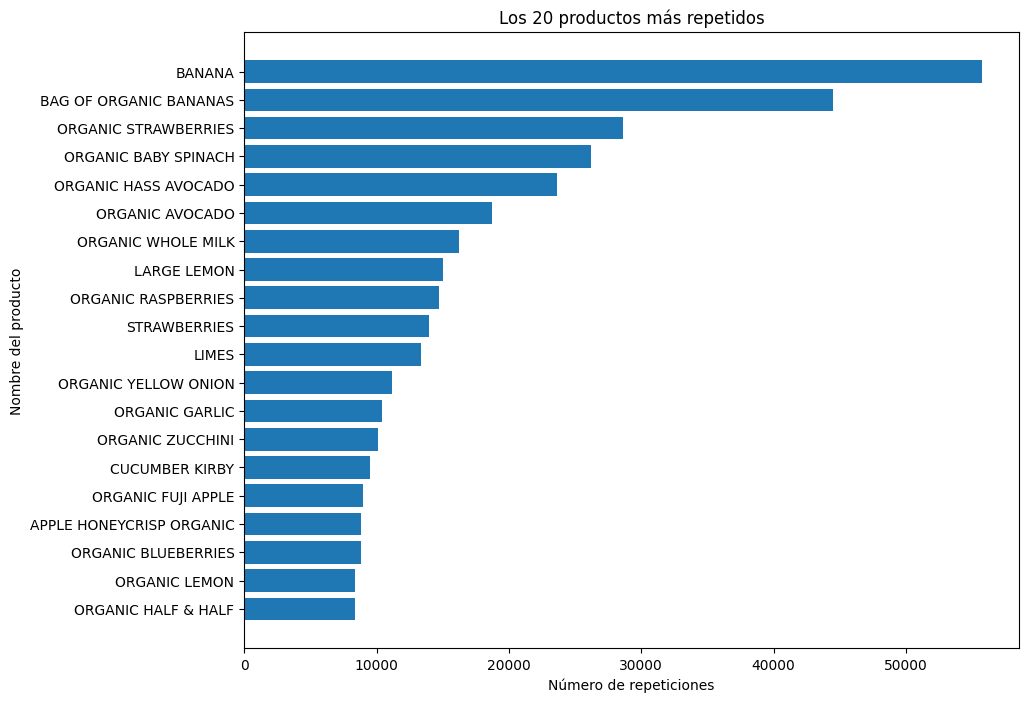

       product_id              product_name  repeat_count
18104       24852                    BANANA         55763
9528        13176    BAG OF ORGANIC BANANAS         44450
15368       21137      ORGANIC STRAWBERRIES         28639
15936       21903      ORGANIC BABY SPINACH         26233
34407       47209      ORGANIC HASS AVOCADO         23629
34828       47766           ORGANIC AVOCADO         18743
20285       27845        ORGANIC WHOLE MILK         16251
34725       47626               LARGE LEMON         15044
20375       27966       ORGANIC RASPBERRIES         14748
12193       16797              STRAWBERRIES         13945
19088       26209                     LIMES         13327
16700       22935      ORGANIC YELLOW ONION         11145
18186       24964            ORGANIC GARLIC         10411
32792       45007          ORGANIC ZUCCHINI         10076
36219       49683            CUCUMBER KIRBY          9538
20543       28204        ORGANIC FUJI APPLE          8989
5978         8

In [104]:
# Filtrar pedidos repetidos
repeat_orders = order_products[order_products['reordered'] == 1]

# Contar el número de repeticiones para cada producto
product_repeat_counts = repeat_orders.groupby('product_id').size().reset_index(name='repeat_count')

# Unir con la información de productos
product_repeat_counts = product_repeat_counts.merge(products, on='product_id')

# Ordenar y seleccionar los 20 principales productos
top_20_repeat_products = product_repeat_counts.sort_values(by='repeat_count', ascending=False).head(20)

# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_20_repeat_products['product_name'], top_20_repeat_products['repeat_count'])
plt.xlabel('Número de repeticiones')
plt.ylabel('Nombre del producto')
plt.title('Los 20 productos más repetidos')
plt.gca().invert_yaxis()  # Opcional: invertir el eje y para que el producto más repetido esté en la parte superior
plt.show()

# Mostrar los resultados en la consola
print(top_20_repeat_products[['product_id', 'product_name', 'repeat_count']])

Similar al anterior caso el producto más solicitado es son las bananas sin embargo la diferencia radica en el hecho que aquellos que ya tienen 1 como input al ser nuevamente solicitados, siendo productos de alto consumo en la canasta familiar.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [46]:
# Calcular el número total de pedidos para cada producto
total_orders_per_product = order_products.groupby('product_id').size().reset_index(name='total_orders')

# Calcular el número de repeticiones de pedido para cada producto
repeat_orders = order_products[order_products['reordered'] == 1]
repeat_orders_per_product = repeat_orders.groupby('product_id').size().reset_index(name='repeat_orders')

# Unir los DataFrames para tener el total de pedidos y las repeticiones en un solo DataFrame
product_orders = total_orders_per_product.merge(repeat_orders_per_product, on='product_id', how='left').fillna(0)

# Calcular la tasa de repetición del pedido para cada producto
product_orders['repeat_rate'] = product_orders['repeat_orders'] / product_orders['total_orders']

# Unir con la información de productos para obtener los nombres de los productos
product_orders = product_orders.merge(products, on='product_id').sort_values(by='repeat_rate', ascending= False)

# Mostrar los resultados
print(product_orders[['product_id', 'product_name', 'total_orders', 'repeat_orders', 'repeat_rate']])

       product_id                                   product_name  \
28108       30644                           ORGANIC FRENCH ROAST   
7340         8054                     BISSLI SMOKEY WHEAT SNACKS   
28114       30650                MUSHROOM LOVER'S VEGGIE BURGERS   
41002       44747                    FROZEN ORGANIC BLACKBERRIES   
40998       44743                                 REAL ZERO COLA   
...           ...                                            ...   
17561       19170     CHEDDAR CHEESE WITH JALAPEÑO PEPPERS BLOCK   
17543       19150                    PLUM SMART 100% JUICE BLEND   
28100       30634  RISERVA PORCINI MUSHROOMS & WHITE TRUFFLE OIL   
44             51              SA EXTRA HOLD MOUSSE HAIR STYLING   
22013       23994                                        Unknown   

       total_orders  repeat_orders  repeat_rate  
28108             2            2.0          1.0  
7340              1            1.0          1.0  
28114             2            2.

Si bien a esta tabla tiene valores del 100% de productos que se piden con bastante frecuencia la cual llega a altos porcentajes

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [47]:
# Unir los pedidos con los detalles de los productos para tener los usuarios y los productos en un solo DataFrame
orders_with_products_df = orders.merge(order_products, on='order_id', how='left')

# Calcular el número total de pedidos para cada usuario
total_orders_per_user = orders_with_products_df.groupby('user_id').size().reset_index(name='total_orders')

# Calcular el número de repeticiones de pedido para cada usuario
repeat_orders = orders_with_products_df[orders_with_products_df['reordered'] == 1]
repeat_orders_per_user = repeat_orders.groupby('user_id').size().reset_index(name='repeat_orders')

# Unir los DataFrames para tener el total de pedidos y las repeticiones en un solo DataFrame
user_orders = total_orders_per_user.merge(repeat_orders_per_user, on='user_id', how='left').fillna(0)

# Calcular la tasa de repetición del pedido para cada usuario
user_orders['repeat_rate'] = user_orders['repeat_orders'] / user_orders['total_orders']

# Mostrar los resultados
print(user_orders[['user_id', 'total_orders', 'repeat_orders', 'repeat_rate']].sort_values(by= 'repeat_rate',ascending=False))

        user_id  total_orders  repeat_orders  repeat_rate
16           22             6            6.0          1.0
38488     50495             2            2.0          1.0
38556     50579             1            1.0          1.0
38569     50593             2            2.0          1.0
38574     50599             4            4.0          1.0
...         ...           ...            ...          ...
3             6             5            0.0          0.0
19           25             1            0.0          0.0
8227      10739             5            0.0          0.0
157375   206134             7            0.0          0.0
28           34             1            0.0          0.0

[157437 rows x 4 columns]


Se visualiza clientes fieles quienes tienen una alta tasa de repetición en los productos que suele repetir pedidos como aquellos que no, siendo posibles clientes que requieren mayor fidelización con la empresa.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

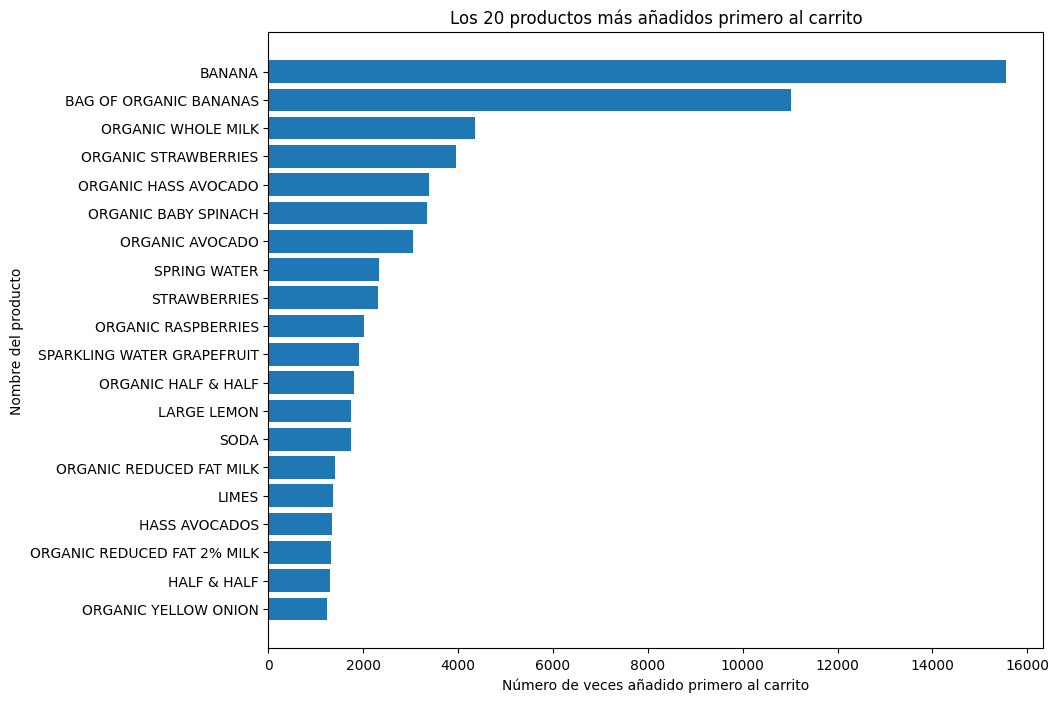

       product_id                 product_name  first_in_cart_count
13414       24852                       BANANA                15562
7127        13176       BAG OF ORGANIC BANANAS                11026
15028       27845           ORGANIC WHOLE MILK                 4363
11384       21137         ORGANIC STRAWBERRIES                 3946
25439       47209         ORGANIC HASS AVOCADO                 3390
11786       21903         ORGANIC BABY SPINACH                 3336
25732       47766              ORGANIC AVOCADO                 3044
10622       19660                 SPRING WATER                 2336
9050        16797                 STRAWBERRIES                 2308
15102       27966          ORGANIC RASPBERRIES                 2024
24024       44632   SPARKLING WATER GRAPEFRUIT                 1914
26519       49235          ORGANIC HALF & HALF                 1797
25658       47626                  LARGE LEMON                 1737
115           196                         SODA  

In [105]:
# Filtrar los productos que fueron añadidos primero al carrito
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

# Contar el número de veces que cada producto fue añadido primero al carrito
product_counts = first_in_cart.groupby('product_id').size().reset_index(name='first_in_cart_count')

# Unir con la información de productos para obtener los nombres de los productos
product_counts = product_counts.merge(products, on='product_id')

# Ordenar y seleccionar los 20 principales productos
top_20_products = product_counts.sort_values(by='first_in_cart_count', ascending=False).head(20)

# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(top_20_products['product_name'], top_20_products['first_in_cart_count'])
plt.xlabel('Número de veces añadido primero al carrito')
plt.ylabel('Nombre del producto')
plt.title('Los 20 productos más añadidos primero al carrito')
plt.gca().invert_yaxis()  # Opcional: invertir el eje y para que el producto más añadido esté en la parte superior
plt.show()

# Mostrar los resultados en la consola
print(top_20_products[['product_id', 'product_name', 'first_in_cart_count']])

Es evidente el comportamiento similar en la lista con las otras anteriores asociadas a los primeros 20 en este caso gracias a la columna add_to_cart_order que nos ayuda a entender cuál es el orden en que el cliente prefiere agregar productos a su canasta.

### Conclusion general del proyecto:
MEDIANTE EL PRESENTE PROYECTO SE LOGRO EVIDENCIAR LO SIGUIENTE:
1. En el momento de la limpieza se tocaron muy poco las tablas donde solo Instacart_orders se le eliminaron los duplicados, adicional la tabla products a pesar de tener nombres en unknown no afectaron el análisis en gran proporción pero sí es necesario tener mayor control en estos ya que pudieron hacer más popular un producto que otro a pesar de haber hecho el análisis con el product_id. Adicional los nulos de order_products, nos da a entender la relevancia existente en la columna add_to_cart_order, el cual proporciona información valiosa de cómo esta puede reflejar las preferencias iniciales cuando un usuario escoge productos.
2. A nivel de análisis nos exponemos situaciones donde la demanda de productos de la canasta familiar son bastante amplios donde productos como lo fueron bananas eran top tanto en popularidad, como en los más pedido así como los primeros que agregan a la canasta, siendo foco de atención mantener la calidad en los productos que preceden una fama manteniendo su calidad al ser los productos top del negocio.

3. Finalmente, entender el movimiento y flujo de clientes a nivel del día y en horas específicas dependiendo el día lo que nos da visual de los intervalos de horas importantes así como los días que presentan mayor demanda para enfocar el mayor recurso de atención en esos momentos donde ayuden a lograr mayor fidelización con la clientela.